In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
# For optimization using pygmo
import pygmo as pg
from udp_initial_condition import udp_initial_condition

# For Plotting
import matplotlib.pyplot as plt

Using numpy backend


In [4]:
# Setup hyperparameters:
body_density = 533                  # https://sci.esa.int/web/rosetta/-/14615-comet-67p
target_altitude = 5000**2           # Target altitude squared
final_time = 20*3600.0              # Final time
start_time = 0                      # Starting time
time_step = 800.0              # Time step size for trajectory propagation.

# Bounds for initial variable domain: [r_x,r_y,r_z,v_x,v_y,v_z]
lower_bounds, upper_bounds = [-6000,-6000,-6000,0,0,0],[6000,6000,6000,2.5,2.5,2.5]

# Optimization parameters
population_size = 10
number_of_generations = 32

In [17]:
#####################################################
#  Observe:                                         #
#       This cell is for testing numerical          #
#       integration without running optimization.   #
#####################################################

import numpy as np

# Starting point
x = np.array([2105.14, 2486.95, -2175.24, 0.56, 0.19, 0.35])

# Choose algorithm: 
#  - "RKF78", "Euler" or "DP8713M"
algorithm = "RKF78"

# Setup problem class
udp = udp_initial_condition(body_density, target_altitude, final_time, start_time, time_step, lower_bounds, upper_bounds, algorithm)

# Compute trajectory
fitness_value, trajectory_info = udp.compute_trajectory(x)



Physical dimension along x (UN-normalized):  5002.5703125 Km


In [18]:
print(trajectory_info.shape)
print(trajectory_info[:,-1])

(6, 126)
[-6.55912071e+02  2.54962781e+02  4.68287426e+03 -3.75514932e-01
 -3.10674693e-01 -2.45549189e-01]


In [15]:
rkf78_traj_info = trajectory_info[0:-1, :]
print(rkf78_traj_info.shape)

(6, 126)


In [29]:
diff = trajectory_info - rkf78_traj_info
#print(np.max(diff))
print(diff[:,-1])

for i in range(6):
    print(np.mean(np.abs(diff[i,:])))

print()

[ 3.52995483e+02  2.54053858e+02  3.86998472e+02 -8.42586403e-03
  4.11378414e-03  6.54707089e-02]
1757.7129071129518
1206.332487281065
1906.5894198497435
0.22772606518315577
0.16670566719816057
0.3027992305296261



BokehModel(combine_events=True, render_bundle={'docs_json': {'7906d5a1-1943-48da-8c18-106849a2dc8d': {'defs': …

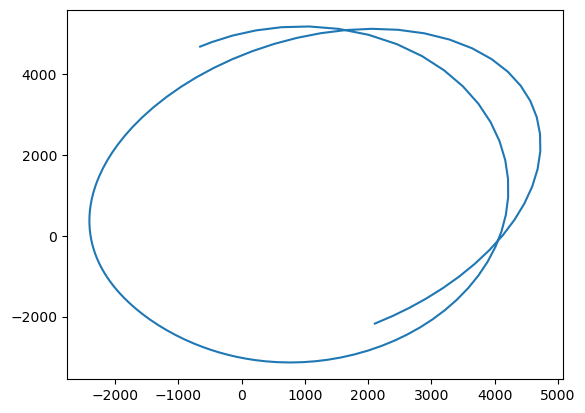

In [19]:
# Plot optimized trajectory
trajectory_info = np.array(trajectory_info)
udp.plot_trajectory(trajectory_info[0:3, :])

plt.plot(trajectory_info[0,:],trajectory_info[2,:])

(6, 126)


In [98]:
# Setup class
udp = udp_initial_condition(body_density, target_altitude, final_time, start_time, time_step, lower_bounds, upper_bounds)

# Setup user defined problem (udp)
prob = pg.problem(udp)
#print(prob)

# Setup optimization algorithm
algo = pg.algorithm(pg.sade(gen = number_of_generations))
pop = pg.population(prob = prob, size = population_size)

# Run optimization
algo.set_verbosity(1)
pop = algo.evolve(pop)

# Logs for output
print("Champion fitness value: ", pop.champion_f) 
print("Champion chromosome: ", pop.champion_x) 

# Retrieving champion chromosome
x = pop.champion_x

# Compute optimized trajectory
fit_val, r_store, v_store, a_store = udp.compute_trajectory(x)

# Plot optimized trajectory
udp.plot_trajectory(r_store)

plt.plot(r_store[1],r_store[2])

Physical dimension along x (UN-normalized):  5002.5703125 Km
truncation_error:  0.0024630706257084967
tau:  0.005516926086729597
it:  1
final time:  72000.0
current time:  0.09954513662842354
truncation_error:  0.0024407404798694188
tau:  0.0055169186974637725
it:  2
final time:  72000.0
current time:  0.19875033478659856
truncation_error:  0.0024240993789135246
tau:  0.005516911375244903
it:  3
final time:  72000.0
current time:  0.2977013232148378
truncation_error:  0.002411692256828246
tau:  0.005516904102949282
it:  4
final time:  72000.0
current time:  0.39646206413925256
truncation_error:  0.0024024278154684
tau:  0.0055168968678749935
it:  5
final time:  72000.0
current time:  0.49508034184128147
truncation_error:  0.002395502062427113
tau:  0.005516889660593999
it:  6
final time:  72000.0
current time:  0.5935918894083687
truncation_error:  0.002390320074482588
tau:  0.005516882474090243
it:  7
final time:  72000.0
current time:  0.6920234476381851
truncation_error:  0.00238644

KeyboardInterrupt: 